In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns
from sklearn import preprocessing as p
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier


es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)
EPOCHS = 100

In [2]:
df = pd.read_csv('weather.csv')

In [3]:
df

,Date,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,...,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
0,01-02-13,20.7,20.9,19.5,22.4,15.6,Yes,6.2,0.0,W,...,S,SSW,17,20,92,84,1017.6,1017.4,8,8
1,02-02-13,22.4,24.8,19.5,25.6,6.0,Yes,3.4,2.7,W,...,W,E,9,13,83,73,1017.9,1016.4,7,7
2,03-02-13,23.5,23.0,21.6,24.5,6.6,Yes,2.4,0.1,W,...,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8
3,04-02-13,21.4,20.9,20.2,22.8,18.8,Yes,2.2,0.0,W,...,NNE,E,22,20,83,90,1014.2,1011.8,8,8
4,05-02-13,22.5,25.5,19.7,25.7,77.4,Yes,4.8,0.0,W,...,NNE,W,11,6,88,74,1008.3,1004.8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,11-01-22,10.5,17.9,8.6,19.6,0.0,No,2.0,7.8,SSE,...,W,SSE,22,20,73,52,1025.9,1025.3,2,2
3267,12-01-22,11.0,18.7,9.3,19.2,0.0,No,2.0,9.2,W,...,W,ESE,20,7,78,53,1028.5,1024.6,2,2
3268,13-01-22,10.2,17.3,9.4,17.7,0.0,No,2.4,2.7,W,...,WNW,N,15,13,85,56,1020.8,1015.0,6,6
3269,14-01-22,12.4,19.0,10.1,19.3,0.0,No,1.4,9.3,W,...,W,W,17,19,56,35,1017.3,1015.1,5,2


In [4]:
df.describe()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,17.821461,21.543656,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093
std,4.894316,4.297053,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274
min,6.400000,10.200000,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000
25%,13.800000,18.400000,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000
50%,18.200000,21.300000,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000
75%,21.700000,24.500000,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000
max,36.500000,44.700000,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000


In [5]:
df.isna().sum()

Date             0
Temp9am          0
Temp3pm          0
MinTemp          0
MaxTemp          0
Rainfall         0
RainToday        0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
dtype: int64

In [6]:

df['RainToday'].value_counts()

No     2422
Yes     849
Name: RainToday, dtype: int64

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y')
df['Month'] = df['Date'].dt.month

In [8]:
df = df.drop(['Date'], axis = 1)

In [9]:
df['WindDir9am'].value_counts()

W      1260
WNW     485
SSW     185
S       156
E       141
ESE     134
SSE     121
NNW     103
N       100
SE      100
WSW      97
NNE      89
NW       85
NE       80
ENE      79
SW       56
Name: WindDir9am, dtype: int64

In [10]:
df['WindGustDir'].value_counts()

W      1425
SSE     239
ENE     214
NE      169
S       169
SSW     163
NNE     149
ESE     140
WSW     134
E       122
WNW      79
NW       68
SE       68
NNW      52
SW       50
N        30
Name: WindGustDir, dtype: int64

In [11]:
df['w_WindDir9am'] = df['WindDir9am'] == 'W'


In [12]:
df

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Month,w_WindDir9am
0,20.7,20.9,19.5,22.4,15.6,Yes,6.2,0.0,W,41,...,17,20,92,84,1017.6,1017.4,8,8,2,False
1,22.4,24.8,19.5,25.6,6.0,Yes,3.4,2.7,W,41,...,9,13,83,73,1017.9,1016.4,7,7,2,True
2,23.5,23.0,21.6,24.5,6.6,Yes,2.4,0.1,W,41,...,17,2,88,86,1016.7,1015.6,7,8,2,False
3,21.4,20.9,20.2,22.8,18.8,Yes,2.2,0.0,W,41,...,22,20,83,90,1014.2,1011.8,8,8,2,False
4,22.5,25.5,19.7,25.7,77.4,Yes,4.8,0.0,W,41,...,11,6,88,74,1008.3,1004.8,8,8,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,10.5,17.9,8.6,19.6,0.0,No,2.0,7.8,SSE,37,...,22,20,73,52,1025.9,1025.3,2,2,1,True
3267,11.0,18.7,9.3,19.2,0.0,No,2.0,9.2,W,30,...,20,7,78,53,1028.5,1024.6,2,2,1,True
3268,10.2,17.3,9.4,17.7,0.0,No,2.4,2.7,W,24,...,15,13,85,56,1020.8,1015.0,6,6,1,False
3269,12.4,19.0,10.1,19.3,0.0,No,1.4,9.3,W,43,...,17,19,56,35,1017.3,1015.1,5,2,1,True


In [13]:
df['WindGustDir'].value_counts()

W      1425
SSE     239
ENE     214
NE      169
S       169
SSW     163
NNE     149
ESE     140
WSW     134
E       122
WNW      79
NW       68
SE       68
NNW      52
SW       50
N        30
Name: WindGustDir, dtype: int64

In [14]:
df['w_WindGustDir'] = df['WindGustDir'] == 'W'

In [15]:
df['Cloud9am'].value_counts()

5    729
1    663
7    639
6    280
8    262
3    220
2    206
0    149
4    122
9      1
Name: Cloud9am, dtype: int64

In [16]:
df = df.drop(['WindDir9am','WindDir3pm', 'WindGustDir','Rainfall', 'Month', 'Cloud9am', 'Cloud3pm'], axis = 1)

In [17]:
#one hot encoding na danych nominalnych, czyli tylko na moim RainToday
temp = pd.get_dummies(df.RainToday, prefix='is')
df['YesRain']=temp['is_Yes']
df = df.drop(["RainToday"], axis =1)

In [18]:
df['YesRain'].value_counts()

0    2422
1     849
Name: YesRain, dtype: int64

In [19]:
df.head(3)

,Temp9am,Temp3pm,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,w_WindDir9am,w_WindGustDir,YesRain
0,20.7,20.9,19.5,22.4,6.2,0.0,41,17,20,92,84,1017.6,1017.4,False,True,1
1,22.4,24.8,19.5,25.6,3.4,2.7,41,9,13,83,73,1017.9,1016.4,True,True,1
2,23.5,23.0,21.6,24.5,2.4,0.1,41,17,2,88,86,1016.7,1015.6,False,True,1


In [20]:
X = df.drop(['YesRain'], axis=1)

y = df['YesRain']

In [21]:
df = p.StandardScaler().fit_transform(X)
df

array([[ 0.58822905, -0.1498131 ,  1.01512601, ...,  0.19902353,
        -0.79155161,  1.13817336],
       [ 0.93562385,  0.75792449,  1.01512601, ...,  0.05654988,
         1.2633415 ,  1.13817336],
       [ 1.16040872,  0.33896868,  1.47625765, ..., -0.05742903,
        -0.79155161,  1.13817336],
       ...,
       [-1.55744474, -0.98772471, -1.20269759, ..., -0.14291322,
        -0.79155161,  1.13817336],
       [-1.107875  , -0.59204423, -1.04898704, ..., -0.12866585,
         1.2633415 ,  1.13817336],
       [-1.72092465, -0.63859487, -1.59795328, ..., -0.08592376,
         1.2633415 ,  1.13817336]])

In [22]:
df = p.MinMaxScaler().fit_transform(X)
df

array([[0.47508306, 0.31014493, 0.65236052, ..., 0.58848614, 0.        ,
        1.        ],
       [0.53156146, 0.42318841, 0.65236052, ..., 0.56716418, 1.        ,
        1.        ],
       [0.56810631, 0.37101449, 0.74248927, ..., 0.55010661, 0.        ,
        1.        ],
       ...,
       [0.12624585, 0.2057971 , 0.21888412, ..., 0.53731343, 0.        ,
        1.        ],
       [0.19933555, 0.25507246, 0.24892704, ..., 0.53944563, 1.        ,
        1.        ],
       [0.09966777, 0.24927536, 0.1416309 , ..., 0.54584222, 1.        ,
        1.        ]])

**kNN:**

In [23]:
# from sklearn.neighbors import KNeighborsClassifier
# def classification(X,y, n_neighbors):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
#     model = KNeighborsClassifier(n_neighbors = n_neighbors)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     return accuracy_score(y_test, y_pred)

# results = []
# n_neighbors = [i for i in range(1,50,2)]
# for neighbor in n_neighbors:
#     results.append(classification(X,y, neighbor))

# plt.plot(range(1,50,2),results)
# plt.xlabel("number of neighbors")
# plt.ylabel("accuracy")



In [24]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state = 42)
# model = KNeighborsClassifier(n_neighbors = 7)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# y_pred_train = model.predict(X_train)
# print (f"acc_train: {accuracy_score(y_train, y_pred_train)} \nacc_test {accuracy_score(y_test, y_pred)}")

In [25]:
# def clasification_7(X,y, r_state):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state = r_state)
#     model = KNeighborsClassifier(n_neighbors = 7)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     y_pred_train = model.predict(X_train)
#     return accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred)

In [26]:
# results_train = []
# results_test = []
# for i in range(0,50,2):
#     results = clasification_7(X,y, i)
#     results_train.append(results[0])
#     results_test.append(results[1])

# plt.plot(results_train, label="traning")
# plt.plot(results_test, label="test")
# plt.xlabel("iteration")
# plt.ylabel("accuracy")
# plt.legend()

In [27]:
# # # metryki
# print("Accuracy for 7 neighbours: 0.8570336391437309 \n")

# from sklearn.metrics import recall_score
# print(f"Recall: \n {recall_score(y_test, y_pred)}\n")

# from sklearn.metrics import precision_score
# print(f"Precision: \n {precision_score(y_test, y_pred)}\n")

# # # niestety mój recall znowu odbiega znacząco od precision i accuracy.

# from sklearn.metrics import f1_score
# print(f"F1: \n {f1_score(y_test, y_pred)}")


In [28]:
# # podział danych na dane i labele
# # X = df[['Temp9am', 'Temp3pm', 'MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Month', 'w_WindDir9am',	'w_WindGustDir']]
# # y = df[['YesRain']]

# X = df.drop(['YesRain'], axis=1)

# y = df['YesRain']

**SVC:**

In [29]:
# def clasification(X,y,kernel):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
#     model = SVC(kernel = kernel) #stworzenie klasyfikatora
#     model.fit(X_train, y_train) #trenowanie klasyfikatora - naucz się dopasować dane uczące doetykiet
#     y_pred = model.predict(X_test) #predykcja na danych testowych
#     return accuracy_score(y_test, y_pred)

In [30]:
# kernels = ['linear', 'poly', 'rbf']
# for kernel in kernels:
#   print(kernel, clasification(X,y, kernel))

In [31]:
# linear ma najlepsze

In [32]:
# def clasification(X,y, c_value):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
#     model_svc = SVC(kernel = "linear", C = c_value)
#     model_svc.fit(X_train, y_train)
#     y_pred = model_svc.predict(X_test)
#     return accuracy_score(y_test, y_pred)

# #c values to jest "szerokośc" marginesu w svm
# results = []
# c_values = [0.001, 0.01, 0.1, 1, 10]
# for c in c_values:
#     results.append(clasification(X,y, c))
#     print(results[-1])

In [33]:
# def clasification(X,y, r_state):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state = r_state)
#     model_svc = SVC(kernel = "linear", C = 1)
#     model_svc.fit(X_train, y_train)
#     y_pred = model_svc.predict(X_test)
#     y_pred_train = model_svc.predict(X_train)
#     return accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred)

# results_train = []
# results_test = []
# for i in range(0,50,2):
#     results = clasification(X,y, i)
#     results_train.append(results[0])
#     results_test.append(results[1])


# plt.plot(results_train, label="traning")
# plt.plot(results_test, label="test")
# plt.xlabel("iteration")
# plt.ylabel("accuracy")
# plt.legend()

In [34]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state = 42)
# model_svc = SVC(kernel = "linear", C = 1)
# model_svc.fit(X_train, y_train)
# y_pred = model_svc.predict(X_test)
# y_pred_train = model_svc.predict(X_train)
# print(accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred))

In [35]:
# 0.8405963302752294 0.8244274809160306

In [36]:
# # metryki
# from sklearn.metrics import confusion_matrix
# print(f"Macierz pomyłek:\n{confusion_matrix(y_test, y_pred)}\n")

# from sklearn.metrics import recall_score
# print(f"Recall: \n {recall_score(y_test, y_pred)}\n")

# from sklearn.metrics import precision_score
# print(f"Precision: \n {precision_score(y_test, y_pred)}\n")

# # niestety mój recall odbiega znacząco od precision i accuracy.

# from sklearn.metrics import f1_score
# print(f"F1: \n {f1_score(y_test, y_pred)}")

# # Nierównomierna liczba przykładów w klasach może być powodem niskiego recall'u.

**Sieć neuronowa:**

In [37]:
# # podziel X i y na zbiory uczące i testowe za pomocą train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# print(X_train.shape)

In [38]:
# X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
# X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

In [39]:
# # zbuduj model sieci. W tym przypadku ostatnia warstwa powinna mieć jeden neuron i sigmoidalną funkcję aktywacji
# model = Sequential([
# #
#         Input(shape = (18,)),
# #       wchodza na x kolejnych, a funkcja aktywacji relu oznacza że nie niebędzie wartości ujemnych.
#         Dense(32, activation = 'relu'),
#         Dense(128, activation = 'relu'),
#         Dense(512, activation = 'relu'),
#         Dense(128, activation = 'relu'),
#         Dense(256, activation = 'relu'),
#         Dense(1, activation = 'sigmoid')
# ])

In [40]:
# # binary_crossentropy bo mamy tylko jeden neuron z sigmoidalną funkcją aktywacji
# model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [41]:
# model.summary()


In [42]:
# #naucz sieć
# history = model.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_test, y_test), callbacks = [es])

In [43]:
# Epoch 13/100
# 82/82 [==============================] - 0s 4ms/step - loss: 0.4027 - accuracy: 0.8303 - val_loss: 0.3989 - val_accuracy: 0.8382
# # (na 18cechach)

# a
# 82/82 [==============================] - 0s 4ms/step - loss: 0.4321 - accuracy: 0.8165 - val_loss: 0.4077 - val_accuracy: 0.8397
# 64-128-256

# b
# 82/82 [==============================] - 0s 6ms/step - loss: 0.3920 - accuracy: 0.8268 - val_loss: 0.5126 - val_accuracy: 0.7939
# 32-128-128-256

# c
# 82/82 [==============================] - 1s 6ms/step - loss: 0.4100 - accuracy: 0.8192 - val_loss: 0.3946 - val_accuracy: 0.8366
# 32, activation = 'relu'),
        # Dense(128, activation = 'relu'),
        # Dense(512, activation = 'relu'),
        # Dense(128, activation = 'relu'),
        # Dense(256

In [44]:
# # wyświetl wykresy uczenia
# hist = pd.DataFrame(history.history)

# plt.subplot(1, 2, 1)
# plt.plot(hist.loss, label = "loss")
# plt.plot(hist.val_loss, label = "val_loss")
# plt.xlabel("epoch")
# plt.ylabel("loss")
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(hist.accuracy, label = "accuracy")
# plt.plot(hist.val_accuracy, label = "val_accuracy")
# plt.xlabel("epoch")
# plt.ylabel("accuracy")


# plt.legend()
# plt.savefig('wykres_sieci.png')


**Random Forest Classifier:**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [46]:
X_train.shape, X_test.shape


((2616, 15), (655, 15))

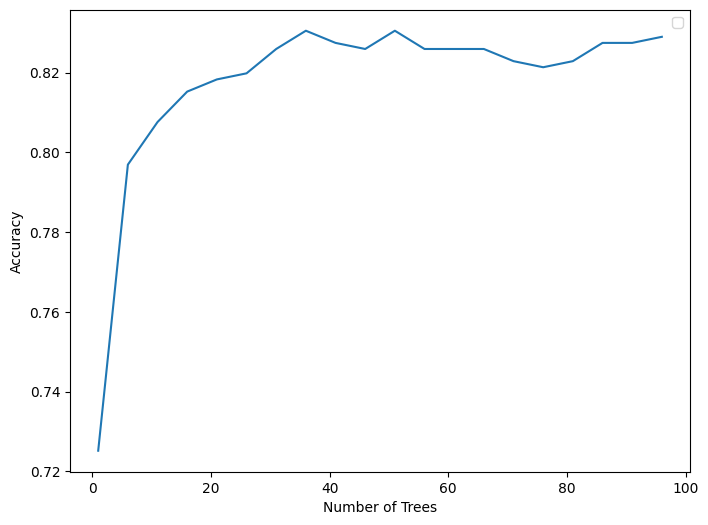

In [47]:
def classification(X, y, n_estimators):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
    model_rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model_rf.fit(X_train, y_train)
    y_pred = model_rf.predict(X_test)
    return accuracy_score(y_test, y_pred)

results_test = []
tree_counts = range(1, 101, 5)  # Liczba drzew od 1 do 100 z krokiem 5
for i in tree_counts:
    results = classification(X, y, i)
    results_test.append(results)

plt.figure(figsize=(8, 6))
plt.plot(tree_counts, results_test)
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [49]:
# instantiate the classifier with n_estimators = 35
rfc = RandomForestClassifier(n_estimators= 35, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('Model accuracy score with 35 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 35 decision-trees : 0.8275


In [50]:
# Model accuracy score with 35 decision-trees : 0.8275

In [51]:
# Now, I will use the feature importance variable to see feature importance scores.
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Humidity3pm      0.180837
Sunshine         0.174818
Humidity9am      0.099348
Temp3pm          0.067173
MaxTemp          0.063527
Temp9am          0.054834
Pressure9am      0.054114
MinTemp          0.053743
Pressure3pm      0.053640
Evaporation      0.047888
WindGustSpeed    0.047212
WindSpeed3pm     0.043371
WindSpeed9am     0.041694
w_WindGustDir    0.010500
w_WindDir9am     0.007300
dtype: float64

In [52]:
# najbardziej istotną cechą jest Humidity3pm, a najmniej w_WindGustDir    0.010029 | w_WindDir9am     0.007781

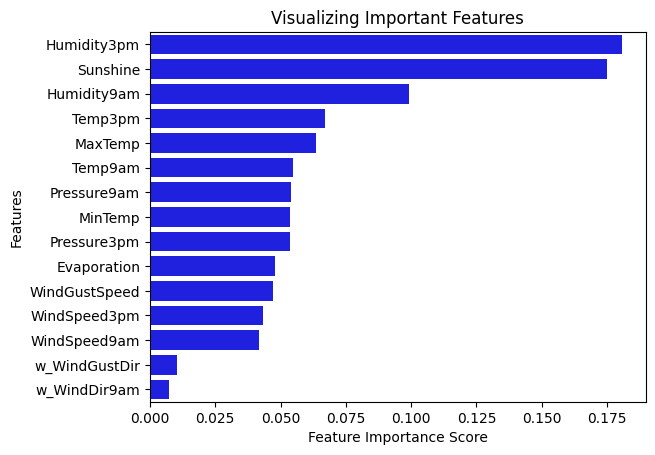

In [58]:
sns.barplot(x=feature_scores, y=feature_scores.index, color='blue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

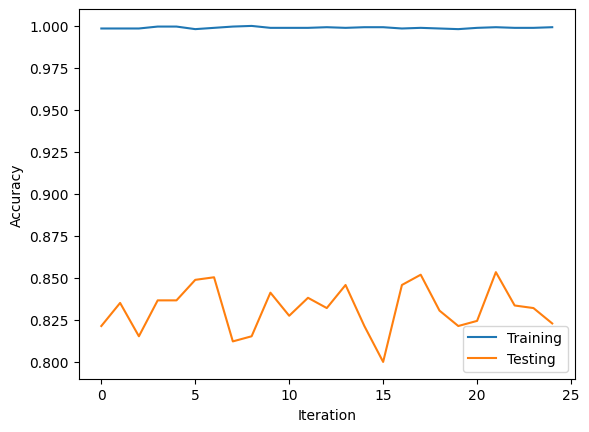

In [54]:
def classification(X, y, r_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=r_state)
    model_rf = RandomForestClassifier(n_estimators=35)
    model_rf.fit(X_train, y_train)
    y_pred_train = model_rf.predict(X_train)
    y_pred_test = model_rf.predict(X_test)
    return accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

results_train = []
results_test = []
for i in range(1, 50, 2):
    results = classification(X, y, i)
    results_train.append(results[0])
    results_test.append(results[1])

plt.plot(results_train, label="Training")
plt.plot(results_test, label="Testing")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [55]:
# metryki
print("Accuracy for 150: 0.8269 \n")

from sklearn.metrics import recall_score
print(f"Recall: \n {recall_score(y_test, y_pred)}\n")

from sklearn.metrics import precision_score
print(f"Precision: \n {precision_score(y_test, y_pred)}\n")

# # niestety mój recall znowu odbiega znacząco od precision i accuracy.

from sklearn.metrics import f1_score
print(f"F1: \n {f1_score(y_test, y_pred)}")


Accuracy for 150: 0.8269 

Recall: 
 0.5195530726256983

Precision: 
 0.775

F1: 
 0.6220735785953176


In [56]:
# # with all
# # Accuracy for 150: 0.8269

# Recall:
#  0.47750865051903113

# Precision:
#  0.7666666666666667

# F1:
#  0.5884861407249466

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       476
           1       0.78      0.52      0.62       179

    accuracy                           0.83       655
   macro avg       0.81      0.73      0.76       655
weighted avg       0.82      0.83      0.82       655



In [ ]:
# niestety mój recall odbiega znacząco od precision i accuracy.